<div class="alert alert-success">

The dataset consists of data about 1000 customers, encompassing 84 features extracted from their financial transactions and current financial status. The main aim is to utilize this dataset for credit risk assessment and forecasting potential defaults.

Included within are two target variables, one designed for classification and the other for regression analysis:

- **DEFAULT**: Binary target variable indicating if the customer has defaulted (1) or not (0)
- **CREDIT_SCORE**: Numerical target variable representing the customer's credit score (integer)

and these features:

- **INCOME**: Total income in the last 12 months
- **SAVINGS**: Total savings in the last 12 months
- **DEBT**: Total existing debt
- **R_SAVINGS_INCOME**: Ratio of savings to income
- **R_DEBT_INCOME**: Ratio of debt to income
- **R_DEBT_SAVINGS**: Ratio of debt to savings

Transaction groups (**GROCERIES**, **CLOTHING**, **HOUSING**, **EDUCATION**, **HEALTH**, **TRAVEL**, **ENTERTAINMENT**, **GAMBLING**, **UTILITIES**, **TAX**, **FINES**) are categorized.

- **T_{GROUP}_6**: Total expenditure in that group in the last 6 months
- **T_GROUP_12**: Total expenditure in that group in the last 12 months
- **R_[GROUP]**: Ratio of T_[GROUP]6 to T[GROUP]_12
- **R_[GROUP]INCOME**: Ratio of T[GROUP]_12 to INCOME
- **R_[GROUP]SAVINGS**: Ratio of T[GROUP]_12 to SAVINGS
- **R_[GROUP]DEBT**: Ratio of T[GROUP]_12 to DEBT

Categorical Features:

- **CAT_GAMBLING**: Gambling category (none, low, high)
- **CAT_DEBT**: 1 if the customer has debt; 0 otherwise
- **CAT_CREDIT_CARD**: 1 if the customer has a credit card; 0 otherwise
- **CAT_MORTGAGE**: 1 if the customer has a mortgage; 0 otherwise
- **CAT_SAVINGS_ACCOUNT**: 1 if the customer has a savings account; 0 otherwise
- **CAT_DEPENDENTS**: 1 if the customer has any dependents; 0 otherwise
- **CAT_LOCATION**: Location (San Francisco, Philadelphia, Los Angeles, etc.)
- **CAT_MARITAL_STATUS**: Marital status (Married, Widowed, Divorced or Single)
- **CAT_EDUCATION**: Level of Education (Postgraduate, College, High School or Graduate)

</div>

In [1]:
import pandas as pd
from sklearn import set_config
import numpy as np

set_config(transform_output="pandas")

<div class="alert alert-info"><b></b>
In this section of the code, we'll load a dataset from a provided URL into a DataFrame named df, omitting the CUST_ID column. We'll then extract the features into matrix X and target variable into array y. The dataset will be split into training (75%) and test (25%) sets, with the features stored in X_train and X_test, and the target variables in y_train and y_test. This setup prepares our data for modeling and evaluation. 
</div>

In [2]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/AI2_23_24_credit_score.csv')
df = df.drop(columns = ['CUST_ID'])
X = df.drop(columns = ['DEFAULT'])
y = df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=42)


<div class="alert alert-info"><b></b>
In this section, we'll build a two-branched Pipeline to process categorical and numerical attributes separately. For categorical variables, we'll use a SimpleImputer with a 'most frequent' strategy followed by an OneHotEncoder. For numerical attributes, we'll implement a SimpleImputer with a 'mean' strategy and a StandardScaler. The pipeline will culminate in training an MLPClassifier with early_stopping set to True and a maximum of 250 iterations. The entire pipeline will be stored in a variable named pipe. This structure optimizes our data preprocessing and model training process.
</div>

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Creation of numerical and categorical features list
categorical_features = X_train.select_dtypes(include = ['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include = ['int64', 'float64']).columns.tolist()    

# Preprocessing for numerical data
numerical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipe, numerical_features),
        ('cat', categorical_pipe, categorical_features)])

# Define model
model = MLPClassifier(random_state=42, max_iter=250, early_stopping=True)

# Bundle preprocessing and modeling code in a pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['INCOME', 'SAVINGS', 'DEBT',
                                                   'R_SAVINGS_INCOME',
                                                   'R_DEBT_INCOME',
                                                   'R_DEBT_SAVINGS',
                                                   'T_CLOTHING_12',
                                                   'T_CLOTHING_6', 'R_CLOTHING',
                                                   'R_CLOTHING_INCOME',
                                                   'R_CLOTHING_SAVINGS',
                                                   'R_CLOTHING_DEBT',
                                                   'T_EDUCATION_12',
                                                   'T_EDU...
                                                   'R_FINES', 'R_FINES_INCOME',
                                                   'R_FINES_SAVINGS',
                                                   'R_FINES_DEBT', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['CAT_GAMBLING',
                                                   'CAT_LOCATION',
                                                   'CAT_MARITAL_STATUS',
                                                   'CAT_EDUCATION'])])),
                ('model',
                 MLPClassifier(early_stopping=True, max_iter=250,
                               random_state=42))])

In [7]:
X_train

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,CAT_LOCATION,CAT_MARITAL_STATUS,CAT_EDUCATION
82,99273,148910.0,89346,1.5000,0.9000,0.6000,7158,2366,0.3305,0.0721,...,No,1,0,0,1.0,0,676,Denver,Divorced,College
991,103993,75631.0,841397,0.7273,8.0909,11.1250,7627,2108,0.2764,0.0733,...,High,1,0,0,1.0,0,555,Philadelphia,Widowed,Postgraduate
789,60299,32890.0,405646,0.5454,6.7272,12.3334,4216,2025,0.4803,0.0699,...,High,1,0,0,1.0,0,593,Boston,Divorced,Graduate
894,21744,125632.0,45904,5.7778,2.1111,0.3654,1035,424,0.4097,0.0476,...,No,1,0,0,1.0,0,606,Atlanta,Single,Postgraduate
398,273344,925166.0,2922684,3.3846,10.6923,3.1591,17690,9010,0.5093,0.0647,...,High,1,1,0,1.0,0,506,Denver,Divorced,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,87105.0,40773,3.6700,2.8316,0.4681,0,0,0.5089,0.0840,...,No,1,0,0,1.0,0,556,Detroit,Widowed,Postgraduate
270,54349,76089.0,293485,1.4000,5.4000,3.8571,8491,5442,0.6409,0.1562,...,No,1,1,0,1.0,0,578,Dallas,Divorced,High School
860,44768,40698.0,773262,0.9091,17.2727,19.0000,1456,985,0.6765,0.0325,...,High,1,0,0,1.0,0,453,Washington DC,Married,Graduate
435,58383,164532.0,488290,2.8181,8.3636,2.9678,1166,295,0.2530,0.0200,...,No,1,0,0,1.0,0,584,Dallas,Single,Postgraduate


<div class="alert alert-info"><b></b>
In this section, we'll create a GridSearchCV object named grid with a three-fold cross-validation setup to optimize the hyperparameters of the pipeline we previously defined. We'll carefully select a few key hyperparameters for the MLPClassifier to refine its performance without evaluating too many combinations. Once the grid search is complete, we'll extract the accuracy score of the best hyperparameter combination and store it in a variable called training_score. This approach focuses on enhancing the model's predictive ability efficiently.
<br><i></i>
</div>

In [20]:
from sklearn.model_selection import GridSearchCV

# Parameters of the neural network to tune
param_grid = {
    'model__alpha': [0.001, 0.01],  # L2 penalty (regularization term) parameter
    'model__learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'model__hidden_layer_sizes': [(10,), (50,), (100,)],  # Number of neurons in the hidden layer
    'model__activation': ['logistic', 'tanh', 'relu'],  # Activation function
    'model__solver': ['adam', 'sgd'],  # Solver for weight optimization
    'model__batch_size': [32, 64],  # Size of minibatches for stochastic optimizers
    'model__learning_rate': ['constant', 'adaptive'],  # Learning rate schedule for weight updates
}

# Create the GridSearchCV object
grid = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Get the score (accuracy) of the best hyperparameter combination
training_score = grid.best_score_

print("Best training score:", training_score)

Best training score: 0.7399999999999999


<div class="alert alert-info"><b></b>
In this code section, we'll compute the generalization score of the model using the results from our GridSearchCV setup. This score helps us evaluate if the model is overfitting. We'll store this generalization score in a variable named score. This step ensures we assess the model's performance on unseen data.
<br><i></i>
</div>

In [26]:
# Compute the score (accuracy) on the test set
score = grid.score(X_test, y_test)

print("Test score:", score)

# The score function here will automatically use the best hyperparameter combination found during the grid search to make predictions on X_test and then compare these predictions against y_test to compute the accuracy.

Test score: 0.72


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">Results</h2>
    <p>The model's performance is summarized by the following accuracy scores:</p>
    <ul>
        <li><strong>Training Accuracy:</strong> 0.7399</li>
        <li><strong>Test Accuracy:</strong> 0.72</li>
    </ul>
    <p>These results indicate a high degree of consistency between the model's ability to predict outcomes on data it has seen during training and its performance on new, unseen data. The slight difference of just 0.0199 between the training and test accuracy suggests that our model is well-tuned and generalizes effectively.</p>
    <h2 style="color: #333;">Conclusion</h2>
    <p>Given the similarity between the training and test accuracy scores, we can confidently conclude that our model is <strong>not overfitting</strong>.</p>
</div>

<div class="alert alert-info"><b></b>
In this section, we'll code a stacked denoising autoencoder using Keras, with the goal of compressing the feature matrix into three dimensions. This task allows for flexibility in experimenting with different architectural elements, activation functions, loss measures, and training hyperparameters. The autoencoder will be constructed to enhance the robustness and feature representation of our data, enabling effective dimensionality reduction.
<br><i></i>
</div>

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <p>We will tackle the exercise in the following way: we will start by building a model, with 50 epochs, we will then evaluate the model's performance, based on insights extracted from it we will improve the model (changing some hyperparameters) and re-evaluate the insights obtained. This is an iterative approach that might be helpful for us.</p>
</div>

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split


# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_processed, test_size=0.25, random_state=42)

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 3  # Compress to 3 dimensions

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

# Encoder part to compress data
encoder = Model(input_layer, encoded)

# Compressing the training and testing data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Review the structure and first few compressed features
print(autoencoder.summary())
print("Sample of compressed features:", X_train_encoded[:5])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9854 - val_loss: 1.1007
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9416 - val_loss: 1.0862
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9513 - val_loss: 1.0637
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9187 - val_loss: 1.0328
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8656 - val_loss: 0.9964
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8510 - val_loss: 0.9609
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7928 - val_loss: 0.9322
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7718 - val_loss: 0.9117
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7493 - val_loss: 0.8961
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7490 - val_loss: 0.8821
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7331 - val_loss: 0.8694
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7048 - val_loss: 0.8591
Epoch 13/50


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 110)            │        14,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,277 (532.34 KB)

 Trainable params: 45,425 (177.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,852 (354.89 KB)

None
Sample of compressed features: [[25.676014   5.4048176 12.83231  ]
 [13.38014   16.339224   5.269554 ]
 [17.273626  17.7522     4.7843304]
 [31.879036   6.161277  10.440252 ]
 [ 6.8683696 12.910175  18.641678 ]]


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6628 - val_loss: 0.7930
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6596 - val_loss: 0.7916
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6443 - val_loss: 0.7901
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6599 - val_loss: 0.7886
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6460 - val_loss: 0.7875
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6652 - val_loss: 0.7869
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6402 - val_loss: 0.7858
Epoch 8/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6330

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6426 - val_loss: 0.7851
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6572 - val_loss: 0.7848
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6488 - val_loss: 0.7845
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6263 - val_loss: 0.7841
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6453 - val_loss: 0.7838
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6478 - val_loss: 0.7832
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6393 - val_loss: 0.7824
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6425 - val_loss: 0.7821
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6483 - val_loss: 0.7819
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6414 - val_loss: 0.7814
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6352 - val_loss: 0.7787
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6439 - val_loss: 0.7786
Epoch 20/50
3/3

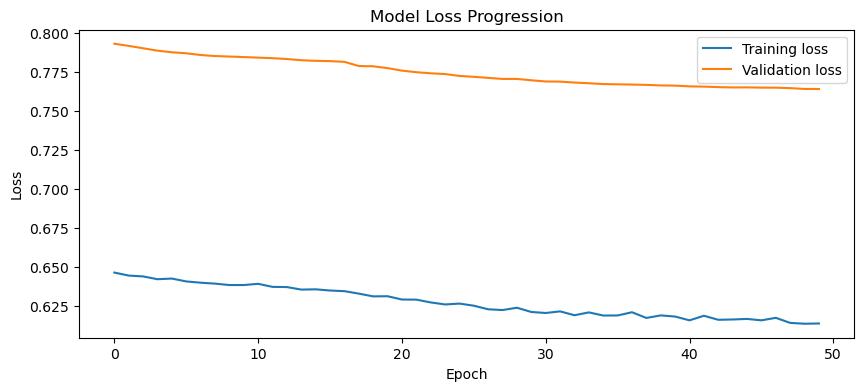

In [29]:
# Let's visualize the training loss and validation loss over the epochs

import matplotlib.pyplot as plt

# Capture the history
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Here we can observe that even though the model loss converges, it is not really fast (we will later see that the loss converges much faster in the next model, therefore only then will we reduce the number of epochs)

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">Results</h2>
    <p>Here we can observe that even though the model loss converges, it is not really fast (we will later see that the loss converges much faster in the next model, therefore only then will we reduce the number of epochs). We proceed with further checking of our model's performance through a 2D TSNE plot.
</p></div>

In [30]:
# Assuming X_train_encoded is an array-like object with shape (n_samples, n_features)
#import tsne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_encoded)

In [31]:
y_train.head()

82     0
991    0
789    0
894    0
398    1
Name: DEFAULT, dtype: int64

In [32]:
X_train_tsne

,tsne0,tsne1
0,-3.412456,12.269816
1,-7.422379,-5.796405
2,-6.308905,-4.142583
3,23.119827,0.228147
4,-23.517179,-0.810325
...,...,...
745,27.495749,7.959933
746,1.792537,-1.455522
747,9.622139,3.435276
748,0.298512,15.480287


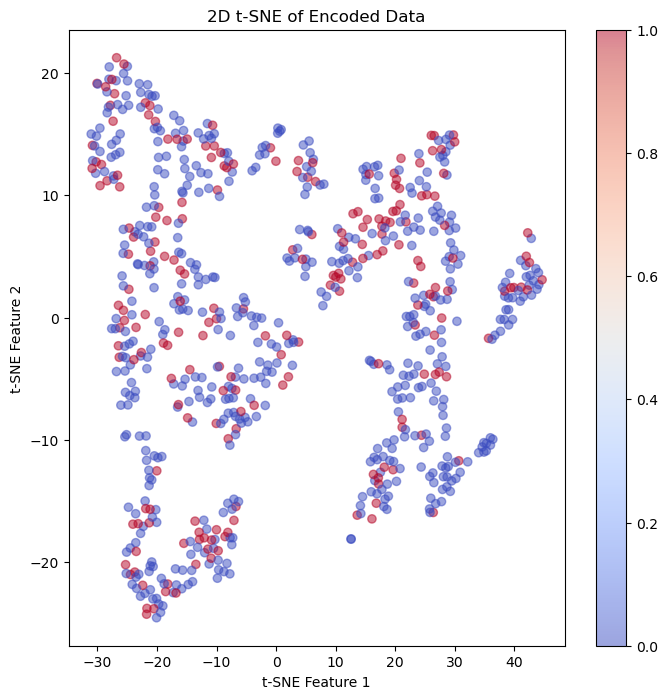

In [33]:
import matplotlib.pyplot as plt

# Now, X_train_tsne is a DataFrame with two columns: tsne_feature_1 and tsne_feature_2
tsne_feature_1 = X_train_tsne['tsne0']
tsne_feature_2 = X_train_tsne['tsne1']

# Assuming y_train is a DataFrame and we need to extract a Series for coloring
y_train_series = y_train.squeeze()  # This should convert a single-column DataFrame to a Series

# Plot the t-SNE features
plt.figure(figsize=(8, 8))
scatter = plt.scatter(tsne_feature_1, tsne_feature_2, c=y_train_series, cmap='coolwarm', alpha=0.5)

# Add a color bar for reference
plt.colorbar(scatter)
plt.title('2D t-SNE of Encoded Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <h2 style="color: #333;">Observations</h2>
    <ul>
        <li>Class overlap: There appears to be a fair amount of overlap between the two classes as indicated by the intermingling of colors. This suggests that the current feature representation may not be sufficiently discriminative.</li>
        <li>Cluster Formation: While there's no clear separation, there seems to be some structure in the data with points forming loose clusters. This structure could be leveraged for better classification.</li>
        <li>The plot depends a lot on the split!</li>
    </ul>
    <h2 style="color: #333;">Improving our model</h2>
    <p>One approach would be to increase the complexity of the model by introducing more layers, but we are restricted by the statement of the problem to do so as it indicates we can only use 3.</p>
    <ul>
        <li>Hyperparameter Tuning: Adjusting the learning rate, batch size, or other training parameters to refine the learning process.</li>
        <li>Regularization: Introducing dropout or L1/L2 regularization to the autoencoder to prevent overfitting and encourage the model to learn more robust features.</li>
        <li>Alternative Dimensionality Reduction: Exploring other dimensionality reduction techniques such as UMAP or PCA to see if they yield better separability.</li>
    </ul>
</div>


In [34]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_processed, test_size=0.25, random_state=42)

# Define the autoencoder architecture with regularization
input_dim = X_train.shape[1]
encoding_dim = 3  # Compress to 3 dimensions
dropout_rate = 0.1  # Dropout rate for regularization

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(dropout_rate)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(dropout_rate)(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Learning rate scheduler for hyperparameter tuning
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))
callback = LearningRateScheduler(scheduler)

# Compile the autoencoder with the Adam optimizer and mean squared error loss
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,   #We still keep the number of epochs as 50
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[callback])  # Include the learning rate scheduler in training

# Encoder part to compress data
encoder = Model(input_layer, encoded)

# Compressing the training and testing data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Review the structure and first few compressed features
print(autoencoder.summary())
print("Sample of compressed features:", X_train_encoded[:5])


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.9964 - val_loss: 1.1041 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9544 - val_loss: 1.0938 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9555 - val_loss: 1.0758 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9220 - val_loss: 1.0488 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8938 - val_loss: 1.0137 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8779 - val_loss: 0.9757 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8080 - val_loss: 0.9424 - learning_rate: 0.0010
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7928 - val_loss: 0.9192 - learning_rate: 0.0010
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7743 - val_loss: 0.9058 - learning_rate: 0.0010
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6582 - val_loss: 0.8205 - learning_rate: 4.5049e-05
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6623 - val_loss: 0.8203 - learning_rate: 4.0762e-05
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6822 - val_loss: 0.8201 - learning_rate: 3.6883e-05
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6898 - val_loss: 0.8199 - learning_rate: 3.3373e-05
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6731 - val_loss: 0.8198 - learning_rate: 3.0197e-05
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6549 - val_loss: 0.8196 - learning_rate: 2.7324e-05
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6580 - val_loss: 0.8195 - learning_rate: 2.4724e-05
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6674 - val_loss: 0.8194 - learning_rate: 2.2371e-05
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6727 - val_loss: 0.8193 - learning_rate: 2.0242e-05
Epoch 50/50


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 110)            │        14,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,277 (532.34 KB)

 Trainable params: 45,425 (177.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,852 (354.89 KB)

None
Sample of compressed features: [[ 6.8186      3.4022024   9.136726  ]
 [ 4.9280925   3.2070968   6.1884394 ]
 [ 5.5359945   3.5069537   7.601883  ]
 [13.480564    1.5816777   7.6720657 ]
 [ 0.          7.5465326   0.31831253]]


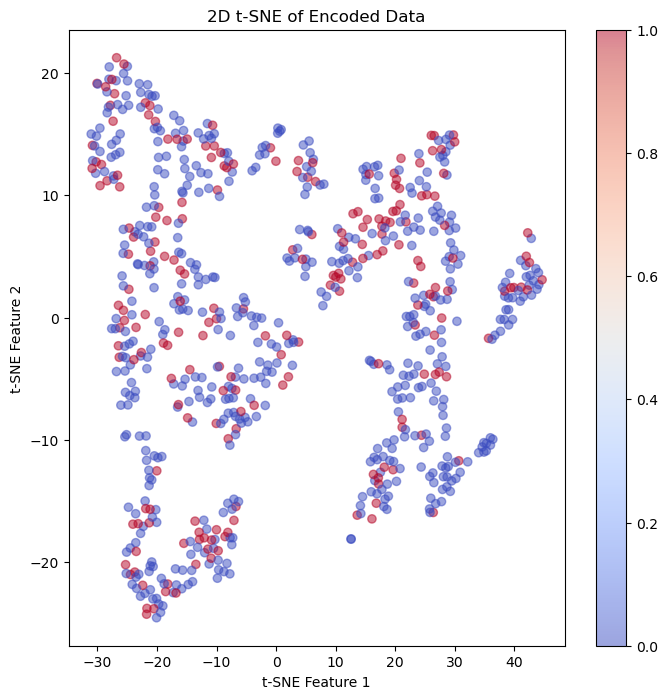

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Now, X_train_tsne is a DataFrame with two columns: tsne_feature_1 and tsne_feature_2
tsne_feature_1 = X_train_tsne['tsne0']
tsne_feature_2 = X_train_tsne['tsne1']

# Assuming y_train is a DataFrame and we need to extract a Series for coloring
y_train_series = y_train.squeeze()  # This should convert a single-column DataFrame to a Series

# Plot the t-SNE features
plt.figure(figsize=(8, 8))
scatter = plt.scatter(tsne_feature_1, tsne_feature_2, c=y_train_series, cmap='coolwarm', alpha=0.5)

# Add a color bar for reference
plt.colorbar(scatter)
plt.title('2D t-SNE of Encoded Data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">

There is no much diference in the t-SNE encoded data 2D plot but it is hard to interpret, we believe the model is better though, because the number of epochs it needs to converge to a lower model loss is smaller as we can see in the following plot.
</p>

</div>


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6689 - val_loss: 0.8191
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6578 - val_loss: 0.8190
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6704 - val_loss: 0.8190
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6614 - val_loss: 0.8189
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6833 - val_loss: 0.8188
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6613 - val_loss: 0.8187
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6759 - val_loss: 0.8186
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6767 - val_loss: 0.8185
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6828 - val_loss: 0.8185
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6890 - val_loss: 0.8184
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6496 - val_loss: 0.8183
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6550 - val_loss: 0.8182
Epoch 13/50


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6686 - val_loss: 0.8169
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6735 - val_loss: 0.8169
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6726 - val_loss: 0.8168
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6809 - val_loss: 0.8167
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6562 - val_loss: 0.8167
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6675 - val_loss: 0.8166
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6526 - val_loss: 0.8165
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6552 - val_loss: 0.8165
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6807 - val_loss: 0.8164
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6652 - val_loss: 0.8164
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6564 - val_loss: 0.8163
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6671 - val_loss: 0.8162
Epoch 42/50
3/3 

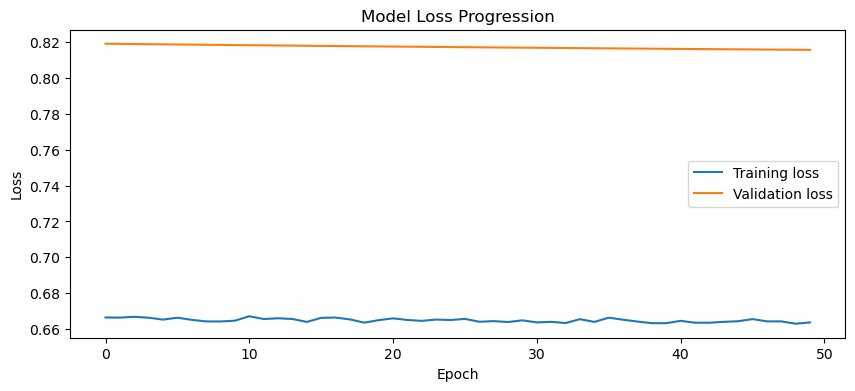

In [36]:
# Let's visualize the training loss and validation loss over the epochs

import matplotlib.pyplot as plt

# Capture the history
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

# Plot training & validation loss values
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">

As both training and validation loss are converging quickly, this means that the model is not gaining any significant improvement through the number of epochs, we could then reduce the number of epochs. This would save computational resources and training time. We proceed to reduce number of epochs to 5. We retrain the model.
</p>

</div>


In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_processed, test_size=0.25, random_state=42)

# Define the autoencoder architecture with regularization
input_dim = X_train.shape[1]
encoding_dim = 3  # Compress to 3 dimensions
dropout_rate = 0.1  # Dropout rate for regularization

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(dropout_rate)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(dropout_rate)(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Learning rate scheduler for hyperparameter tuning
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))
callback = LearningRateScheduler(scheduler)

# Compile the autoencoder with the Adam optimizer and mean squared error loss
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=5,   #We still keep the number of epochs as 50
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[callback])  # Include the learning rate scheduler in training

# Encoder part to compress data
encoder = Model(input_layer, encoded)

# Compressing the training and testing data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Review the structure and first few compressed features
print(autoencoder.summary())
print("Sample of compressed features:", X_train_encoded[:5])


Epoch 1/5


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.9705 - val_loss: 1.1067 - learning_rate: 0.0010
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9819 - val_loss: 1.1020 - learning_rate: 0.0010
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9714 - val_loss: 1.0925 - learning_rate: 0.0010
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9599 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9439 - val_loss: 1.0511 - learning_rate: 0.0010
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           195 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 110)            │        14,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,277 (532.34 KB)

 Trainable params: 45,425 (177.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 90,852 (354.89 KB)

None
Sample of compressed features: [[1.6626856  0.8001211  0.45974565]
 [2.7157142  1.4134257  0.12170498]
 [2.522459   1.6655966  0.27302098]
 [0.7538135  0.         0.        ]
 [4.3633213  3.0007446  0.2942877 ]]


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">

We can now plot the confusion matrix of our best model.
</p>

</div>


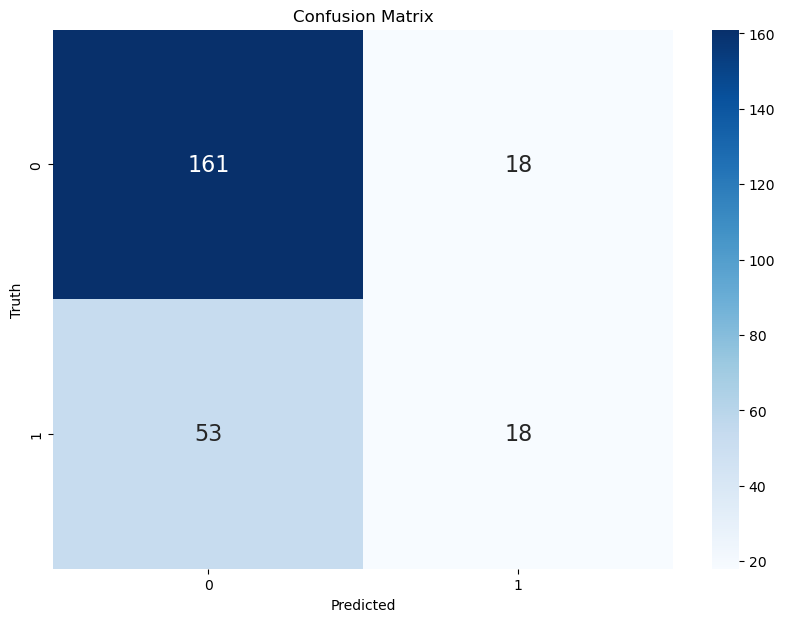

In [38]:
#import tf
import tensorflow as tf
import seaborn as sn

predicted_labels = model.predict(X_test)
predicted_labels = (predicted_labels > 0.5).astype(int)  # Threshold the probabilities to get binary class labels

# Generate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=[10, 7])
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})  # You can choose the color map you prefer
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-info"><b>Exercise 6</b>

Write the code to construct a pipeline for preparing the feature matrix to be used with the previous autoencoder. Save the resulting encoded feature matrix in a variable named ```embeddings```.
<br><i>[1 point]</i>
</div>

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

# Define the autoencoder architecture
def build_autoencoder(input_dim):
    dropout_rate = 0.1  # Dropout rate for regularization

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dropout(dropout_rate)(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(3, activation='relu')(encoded)  # Encoded to 3 dimensions
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dropout(dropout_rate)(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    
    # Learning rate scheduler for hyperparameter tuning
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return float(lr * tf.math.exp(-0.1))
    callback = LearningRateScheduler(scheduler)
    
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    return autoencoder, encoder, callback

# Process the data
X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test = train_test_split(X_processed, test_size=0.25, random_state=42)

# Get the input dimension for the autoencoder
input_dim = X_train.shape[1]

# Build and compile the autoencoder and encoder
autoencoder, encoder, callback = build_autoencoder(input_dim)

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=5, batch_size=256, shuffle=True, validation_data=(X_test, X_test), callbacks=[callback])

# Encode the data
embeddings = encoder.predict(X_train)

# Store embeddings
np.save('embeddings.npy', embeddings)  # Save embeddings for later use if needed

Epoch 1/5
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step - loss: 0.9866

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.9826 - val_loss: 1.1074 - learning_rate: 0.0010
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9685 - val_loss: 1.1043 - learning_rate: 0.0010
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9686 - val_loss: 1.0958 - learning_rate: 0.0010
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9530 - val_loss: 1.0799 - learning_rate: 0.0010
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9552 - val_loss: 1.0548 - learning_rate: 0.0010
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step


<div class="alert alert-info"><b></b>
In this section of the code, we'll visualize the compressed feature matrix obtained from our autoencoder, using the binary target array to color the samples. You can also use a custom plotting method to further analyze the output. After visualizing the data, provide well-supported observations on the quality of the compression achieved. Discuss whether the compression effectively captures the essential features and how it impacts the task at hand. This evaluation will help determine the practicality and efficiency of the data compression.
<br><i></i></div>

In [40]:
embeddings = pd.DataFrame(embeddings, columns=['x', 'y', 'z'])

In [41]:
embeddings.head()

,x,y,z
0,0.0,0.000000,1.590829
1,0.0,0.000000,1.940185
2,0.0,0.000000,2.409431
3,0.0,0.000000,3.084646
4,0.0,0.502392,0.194787


In [42]:
y_train.head()

82     0
991    0
789    0
894    0
398    1
Name: DEFAULT, dtype: int64

In [43]:
y_train_reset = y_train.reset_index(drop=True)
prediction_df = pd.concat([embeddings, y_train_reset], axis=1)
prediction_df.columns = ['x', 'y', 'z', 'label']  # We rename columns to include the label

In [44]:
prediction_df.head()

,x,y,z,label
0,0.0,0.000000,1.590829,0
1,0.0,0.000000,1.940185,0
2,0.0,0.000000,2.409431,0
3,0.0,0.000000,3.084646,0
4,0.0,0.502392,0.194787,1


In [45]:
print(f"Length of embeddings: {len(embeddings)}")
print(f"Length of y_train: {len(y_train)}")

Length of embeddings: 750
Length of y_train: 750


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">

As they have the same size we can now proceed to the plot.
</p>

</div>


In [46]:
import plotly.express as px

embeddings = pd.DataFrame(embeddings, columns=['x', 'y', 'z'])

fig = px.scatter_3d(prediction_df, x='x', y='y', z='z', color=y_train)
fig.show()

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <p>The <strong> plot</strong> depends a lot on the split!</p>
    <p>The <strong>3D scatter plot</strong> displays the <strong>compressed feature space</strong> from an autoencoder, with <strong>one</strong> being that the customer will <strong>default</strong> and <strong>zero</strong> that the customer will <strong>not default</strong>.</p>
    <p>The 3D scatter plot suggests that the autoencoder has created a feature space that can <strong>somewhat separate</strong> the two classes for <strong>credit default prediction</strong>, we can see an area with <strong>blue dots</strong> very separated from <strong>yellow ones</strong>, but it is also true that there is another area where <strong>yellows and blue coexist</strong>. This could affect the model’s ability to <strong>accurately classify credit default risk</strong> but we do not consider it a bad approach.</p>
    <p>Some of the <strong>blue points</strong> being extremely separated may indicate some kind of <strong>outliers</strong>.</p>
    <p>This is applicable to a plot we observed but as the plot keeps changing everytime we run the full code, we could be referring to other axis but similar behaviour overall. We can observe that the <strong>y values</strong> in many cases is close to zero. This could mean that the <strong>y dimension</strong> may not be contributing significantly to the <strong>variance or separation</strong> between classes.</p>
    <p>We can better observe this in 3 diferent plots one for each axis. </p>
</div>


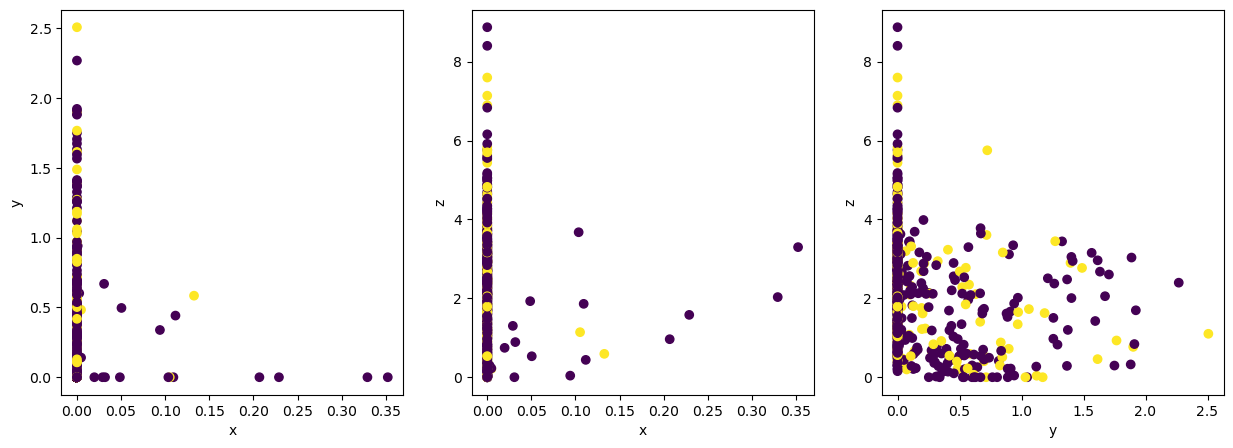

In [47]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot x vs y
axs[0].scatter(embeddings['x'], embeddings['y'], c=y_train)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Plot x vs z
axs[1].scatter(embeddings['x'], embeddings['z'], c=y_train)
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')

# Plot y vs z
axs[2].scatter(embeddings['y'], embeddings['z'], c=y_train)
axs[2].set_xlabel('y')
axs[2].set_ylabel('z')

plt.show()

<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <p>This is a comment based on one of our seeds, it may not be applicatble to all runs. In the first plot (x vs y), there's a clear trend where most data points are concentrated at the lower end of the y axis.
    The second plot (x vs z) shows a more scattered distribution, but still with a concentration of points toward the bottom of the z axis.
The third plot (y vs z) reveals a strong linear relationship between y and z, with data points lined up along a line extending from the origin.</p>

</div>


<div style="background-color: #e0f7fa; border-left: 5px solid #0097a7; padding: 10px; color: #005662;">
    <p>The clustering near the origin might mean that the data needs to be transformed or scaled differently to help the model distinguish between classes.</p>
    <p>The linear relationship seen in the first plot (<strong>x vs y</strong>) for the purple dots could imply redundancy or correlation between features that the model might be capturing.</p>
</div>
